In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('Iris.csv')

In [6]:
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa




In [8]:
# Get a summary of the dataframe
print("Dataframe info:")
print(df.info())
print("\n")

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None




In [10]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())
print("\n")

Missing values in the dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64




In [12]:
# Check for duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())
print("\n")

Number of duplicate rows:
0




In [14]:
df = df.drop(columns='Id')
print("After dropping 'Id' column:")
print(df.head())
print("\n")

After dropping 'Id' column:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa




Generating pair plot...


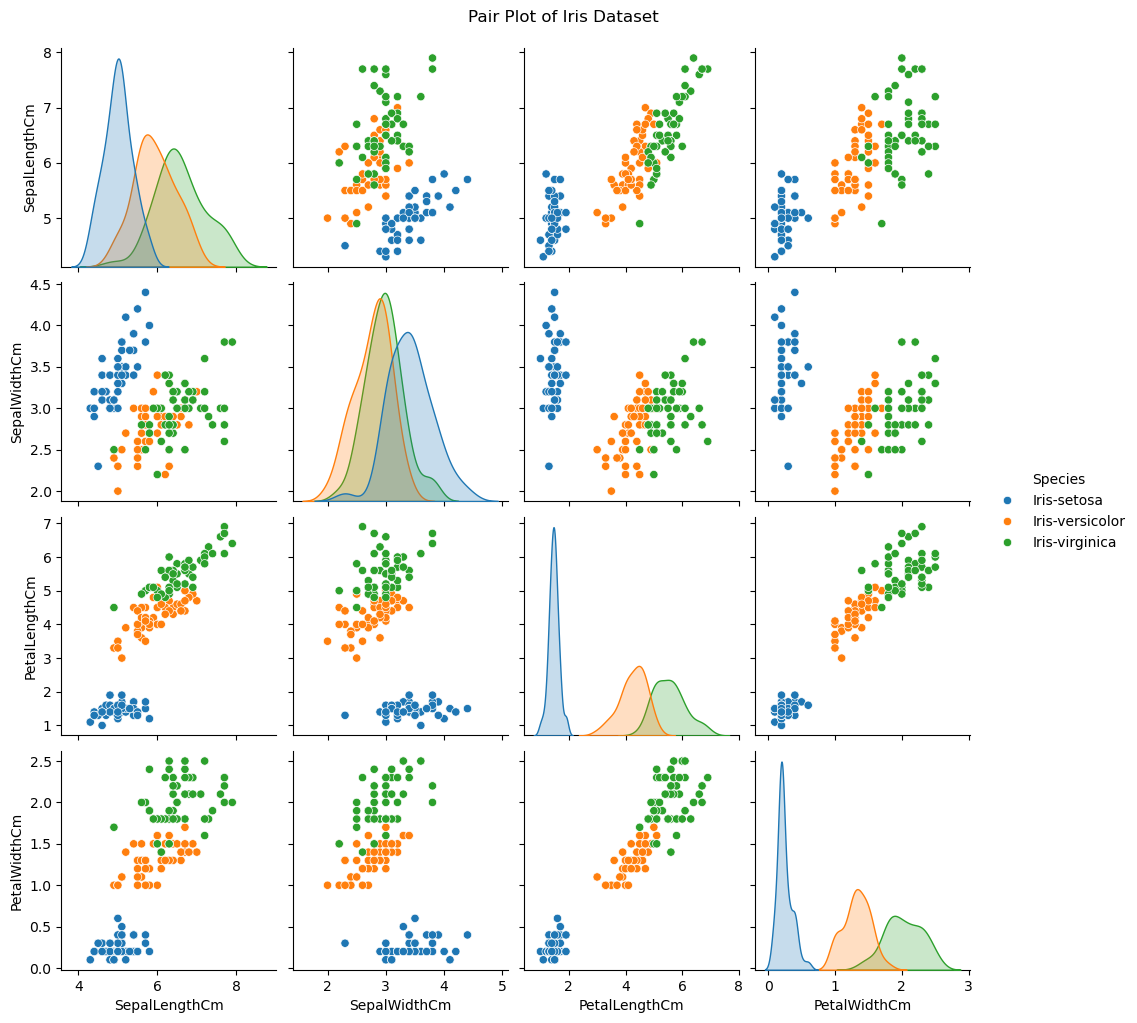

In [16]:
# Visualize the relationships between features using a pair plot
print("Generating pair plot...")
sns.pairplot(df, hue='Species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

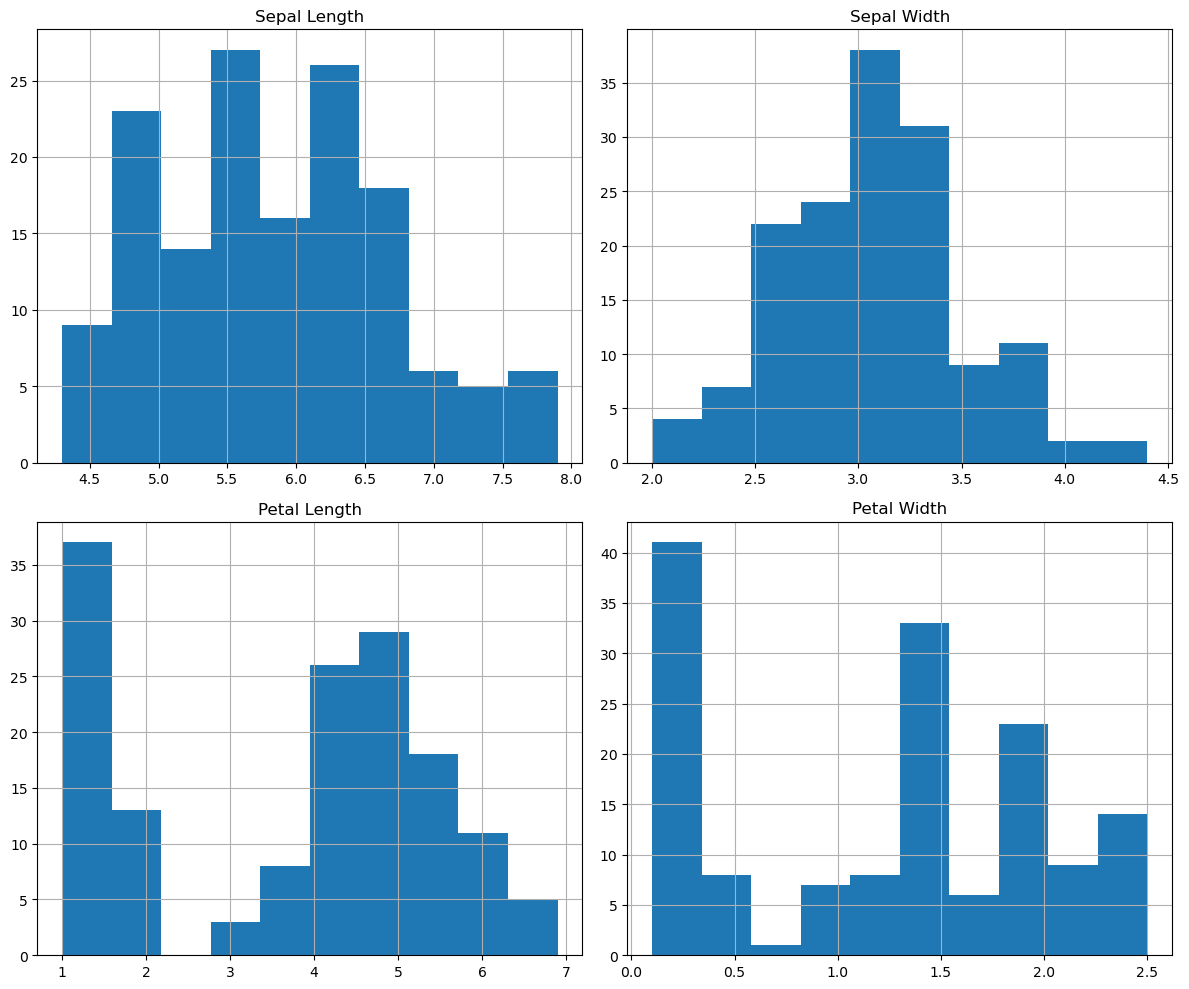

In [18]:
# Visualize the distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df['SepalLengthCm'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')
df['SepalWidthCm'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')
df['PetalLengthCm'].hist(ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')
df['PetalWidthCm'].hist(ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')
plt.tight_layout()
plt.show()

In [20]:
# Separate features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

In [22]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200, solver='lbfgs') # Increased max_iter for convergence
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [26]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [28]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.2f}\n')

Accuracy of the Logistic Regression model: 1.00



In [30]:
# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



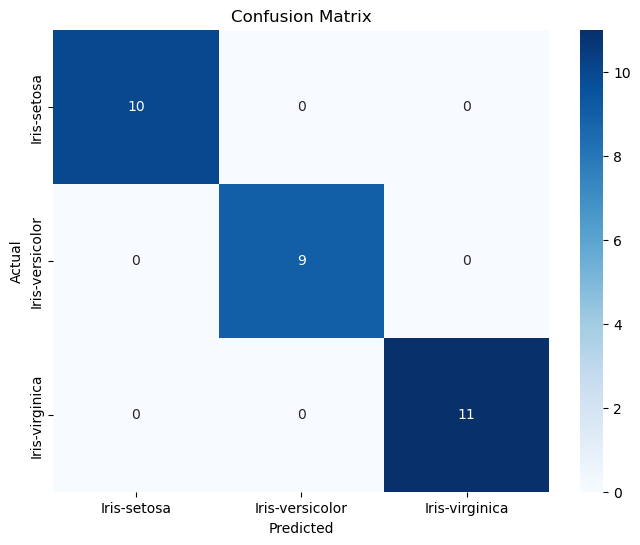

The model has been trained and evaluated. The classification report and confusion matrix provide a detailed performance analysis.


In [32]:

# Plot the confusion matrix to visualize the model's performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("The model has been trained and evaluated. The classification report and confusion matrix provide a detailed performance analysis.")
